<a href="https://colab.research.google.com/github/bzotec/ai-image-classification/blob/main/flowers_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Basic Neural Network Model for image classification using iris dataset

#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
#Create Model class that inherits nn Module
class FlowerModel(nn.Module):

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

torch.manual_seed(41)

#initiate Model
model = FlowerModel()



In [9]:
# Iris Dataset
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df= pd.read_csv(url)
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
#define input (X) and output (y) for training and test
X = df.drop('variety', axis=1)
y = df['variety']


In [11]:
#convert X, Y to numpy arrays
X = X.values
y = y.values

In [12]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [13]:
#convert features to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
#criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()

#adam optimizer, learning rate
optimizer= torch.optim.Adam(model.parameters(), lr=0.01)


epoch: 0 and loss: 1.125203251838684
epoch: 10 and loss: 1.0097211599349976
epoch: 20 and loss: 0.8162347674369812
epoch: 30 and loss: 0.585993230342865
epoch: 40 and loss: 0.4003389775753021
epoch: 50 and loss: 0.26794716715812683
epoch: 60 and loss: 0.1796349585056305
epoch: 70 and loss: 0.12165623158216476
epoch: 80 and loss: 0.0860651507973671
epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'epoch')

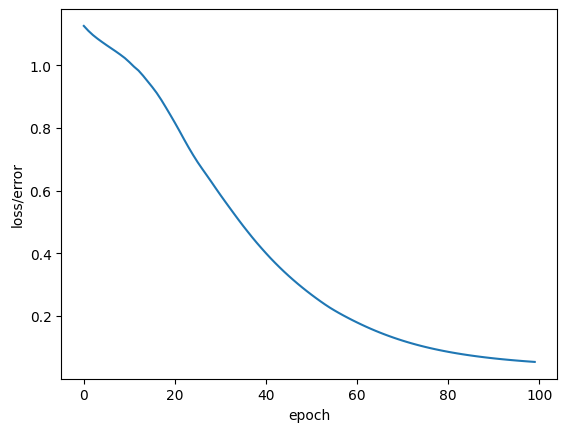

In [15]:
#train model
epochs = 100
losses = []

for i in range(epochs):
  #go forward and get prediction
  y_pred = model.forward(X_train)


  #measure Loss/error
  loss = criterion(y_pred, y_train) # predicted values vs y_train

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'epoch: {i} and loss: {loss}')

  # take error rate of forward to network in order to fine tune weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #tqdm(losses, desc='bar')


#graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")


In [16]:
# evaluate model on test data set
with torch.no_grad(): # we turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [17]:
loss

tensor(0.1315)

In [18]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'a: {i+1}  {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(correct)

model.eval()

acc = correct / 30
print(f'Accuracy of the network on the {y_test.shape} test images: {100*acc} %')


a: 1  tensor([-5.8771,  4.4629,  6.5155]) 	 2
a: 2  tensor([-7.5451,  4.1668,  9.7293]) 	 2
a: 3  tensor([-8.4517,  5.1275, 10.2015]) 	 2
a: 4  tensor([-4.3411,  5.6280,  2.5636]) 	 1
a: 5  tensor([-7.1838,  4.8757,  8.3023]) 	 2
a: 6  tensor([-3.3940,  5.3421,  1.2802]) 	 1
a: 7  tensor([-5.9240,  4.9826,  6.0025]) 	 2
a: 8  tensor([-4.2895,  5.7016,  2.3920]) 	 1
a: 9  tensor([-6.5369,  4.9261,  7.1291]) 	 2
a: 10  tensor([-8.0526,  4.4129, 10.3325]) 	 2
a: 11  tensor([-5.6775,  4.9505,  5.6248]) 	 2
a: 12  tensor([ 4.5748, -2.2579, -2.8925]) 	 0
a: 13  tensor([ 4.2646, -2.0055, -2.7342]) 	 0
a: 14  tensor([-2.1081,  4.0482,  0.5803]) 	 1
a: 15  tensor([ 3.4608, -1.2147, -2.3488]) 	 0
a: 16  tensor([-5.4739,  5.1174,  5.0966]) 	 2
a: 17  tensor([ 4.0637, -1.8045, -2.6504]) 	 0
a: 18  tensor([-5.8090,  4.6057,  6.2494]) 	 1
a: 19  tensor([ 4.9250, -2.5763, -3.0545]) 	 0
a: 20  tensor([ 3.4559, -1.2559, -2.3637]) 	 0
a: 21  tensor([-2.6161,  4.5584,  0.8575]) 	 1
a: 22  tensor([-7.7427